In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
x, y = make_blobs(n_samples=10000, centers=3, n_features=2, random_state=77)

x = torch.from_numpy(x).float()
y = torch.from_numpy(y).long()

# print(x.shape, y.shape)

In [3]:
class SoftmaxReg(nn.Module):
    def __init__(self, input_size, num_classes) :
        super(SoftmaxReg, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    def forward(self, x):
        out = self.linear(x)
        
        return out
    
model = SoftmaxReg(input_size=2, num_classes=3)

In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [7]:
num_epochs = 1000
for epoch in range(num_epochs):
    output = model(x)
    loss = criterion(output, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print("Epoch [{}/{}], Loss : {:.4f}".format(
            epoch+1, num_epochs, loss.item()
        ))

Epoch [100/1000], Loss : 0.0034
Epoch [200/1000], Loss : 0.0031
Epoch [300/1000], Loss : 0.0029
Epoch [400/1000], Loss : 0.0027
Epoch [500/1000], Loss : 0.0026
Epoch [600/1000], Loss : 0.0024
Epoch [700/1000], Loss : 0.0023
Epoch [800/1000], Loss : 0.0022
Epoch [900/1000], Loss : 0.0021
Epoch [1000/1000], Loss : 0.0020


torch.Size([10000, 2]) torch.Size([10000])


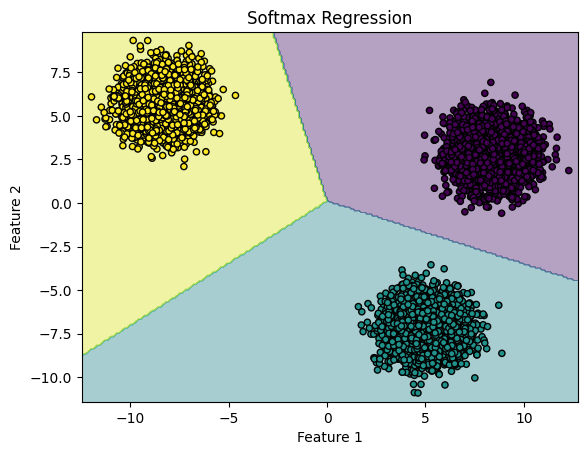

In [8]:
# Plot decision boundary
print(x.shape, y.shape)
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.1), torch.arange(y_min, y_max, 0.1))
Z = model(torch.cat((xx.reshape(-1,1), yy.reshape(-1,1)), dim=1)).argmax(dim=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolors='k')
plt.title('Softmax Regression')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()